# #. 정렬 알고리즘을 이용한 기말 프로그래밍 과제
- 과제 주제: 학생 성적 관리 시스템
    - 학생 성적 데이터가 주어졌을 때, 다양한 정렬 알고리즘을 활용해 데이터를 정렬하고 분석하는 프로그램을 작성하세요.
    - 이 과제를 통해 정렬 알고리즘의 원리를 이해하고, 실제 데이터에 적용하는 방법을 익히게 됩니다.
- 과제 요구사항
  - 학생 정보 생성 및 저장:
    - 30명의 학생 정보를 무작위로 생성하세요. 각 학생의 정보는 다음과 같습니다:
      - 이름: 알파벳 대문자 두 글자 (예: AB, CD)
      - 나이: 18 ~ 22 사이의 정수
      - 성적: 0 ~ 100 사이의 정수
      - 생성된 학생 정보를 리스트에 저장하세요. 각 학생의 정보는 딕셔너리 형태({"이름": "AB", "나이": 19, "성적": 85})로 저장합니다.

  - 정렬 기능 구현:
    - 다음 네 가지 정렬 알고리즘을 구현하세요.
      - 선택 정렬, 삽입 정렬, 퀵 정렬
      - 기수 정렬 (성적 기준으로 정렬할 때만 사용 가능)
    - 각 정렬 알고리즘은 특정 필드를 기준으로 학생 리스트를 정렬할 수 있어야 합니다:
      - 이름 (알파벳 순서)
      - 나이 (오름차순)
      - 성적 (오름차순)
  
  - 메뉴 및 사용자 입력:
    - 프로그램 시작 시, 사용자에게 다음 메뉴를 제공합니다:
      - 이름을 기준으로 정렬
      - 나이를 기준으로 정렬
      - 성적을 기준으로 정렬
      - 프로그램 종료
    - 사용자 입력에 따라 정렬 기준과 정렬 알고리즘을 선택하도록 합니다.
    - 정렬된 결과를 화면에 출력하세요.

  - 단계별 출력 (선택 사항):
    - 선택한 정렬 알고리즘의 정렬 과정을 단계별로 출력하는 기능을 구현합니다.
      - 예를 들어, 선택 정렬의 경우 각 단계마다 리스트 상태를 출력하여 정렬 과정이 어떻게 진행되는지 보여줍니다.

- 제출물
    - 코드: 파이썬 파일로 정렬 프로그램의 전체 코드 제출.
    - 개인 github에 결과물 업로드하기
    - github url은 cyber 캠퍼스에 업로드하기
    

In [ ]:
import random

# 학생 정보 생성 함수
def generate_students(num_students=30):
    students = []
    for _ in range(num_students):
        name = ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=2))
        age = random.randint(18, 22)
        score = random.randint(0, 100)
        students.append({"이름": name, "나이": age, "성적": score})
    return students

# 선택 정렬 구현
def selection_sort(arr, key):
    for i in range(len(arr)):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j][key] < arr[min_index][key]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

# 삽입 정렬 구현
def insertion_sort(arr, key):
    for i in range(1, len(arr)):
        key_value = arr[i]
        j = i - 1
        while j >= 0 and arr[j][key] > key_value[key]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key_value

# 퀵 정렬 구현
def quick_sort(arr, key):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x[key] < pivot[key]]
    middle = [x for x in arr if x[key] == pivot[key]]
    right = [x for x in arr if x[key] > pivot[key]]
    return quick_sort(left, key) + middle + quick_sort(right, key)

# 기수 정렬 구현 (성적 기준으로만 가능)
def radix_sort(arr, key):
    max_value = max(student[key] for student in arr)
    exp = 1
    while max_value // exp > 0:
        counting_sort(arr, key, exp)
        exp *= 10

def counting_sort(arr, key, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for student in arr:
        index = student[key] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    for i in range(n - 1, -1, -1):
        index = arr[i][key] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1

    for i in range(n):
        arr[i] = output[i]

# 메뉴 출력 및 사용자 입력 처리
def display_menu():
    print("\n학생 성적 관리 시스템")
    print("1. 이름을 기준으로 정렬")
    print("2. 나이를 기준으로 정렬")
    print("3. 성적을 기준으로 정렬")
    print("4. 프로그램 종료")
    return int(input("원하는 작업을 선택하세요: "))

# 메인 프로그램
def main():
    students = generate_students()
    while True:
        choice = display_menu()
        if choice == 4:
            print("프로그램을 종료합니다.")
            break

        print("\n1. 선택 정렬")
        print("2. 삽입 정렬")
        print("3. 퀵 정렬")
        if choice == 3:  # 성적 정렬 시 기수 정렬 가능
            print("4. 기수 정렬")
        sort_choice = int(input("사용할 정렬 알고리즘을 선택하세요: "))

        key = "이름" if choice == 1 else "나이" if choice == 2 else "성적"

        if sort_choice == 1:
            selection_sort(students, key)
        elif sort_choice == 2:
            insertion_sort(students, key)
        elif sort_choice == 3:
            students = quick_sort(students, key)
        elif sort_choice == 4 and choice == 3:
            radix_sort(students, key)
        else:
            print("잘못된 입력입니다.")
            continue

        print(f"\n{key} 기준으로 정렬된 결과:")
        for student in students:
            print(student)

# 프로그램 실행
if __name__ == "__main__":
    main()



학생 성적 관리 시스템
1. 이름을 기준으로 정렬
2. 나이를 기준으로 정렬
3. 성적을 기준으로 정렬
4. 프로그램 종료

1. 선택 정렬
2. 삽입 정렬
3. 퀵 정렬
4. 기수 정렬

성적 기준으로 정렬된 결과:
{'이름': 'SR', '나이': 21, '성적': 2}
{'이름': 'GD', '나이': 20, '성적': 2}
{'이름': 'WC', '나이': 21, '성적': 18}
{'이름': 'NX', '나이': 19, '성적': 24}
{'이름': 'YO', '나이': 19, '성적': 25}
{'이름': 'RU', '나이': 18, '성적': 25}
{'이름': 'BK', '나이': 18, '성적': 30}
{'이름': 'OB', '나이': 21, '성적': 30}
{'이름': 'OM', '나이': 20, '성적': 31}
{'이름': 'BX', '나이': 22, '성적': 32}
{'이름': 'KP', '나이': 18, '성적': 35}
{'이름': 'RB', '나이': 19, '성적': 36}
{'이름': 'RS', '나이': 18, '성적': 36}
{'이름': 'KT', '나이': 18, '성적': 37}
{'이름': 'AK', '나이': 20, '성적': 37}
{'이름': 'DK', '나이': 19, '성적': 43}
{'이름': 'JV', '나이': 19, '성적': 51}
{'이름': 'PZ', '나이': 18, '성적': 53}
{'이름': 'KJ', '나이': 22, '성적': 53}
{'이름': 'UE', '나이': 20, '성적': 61}
{'이름': 'TQ', '나이': 22, '성적': 71}
{'이름': 'TR', '나이': 21, '성적': 74}
{'이름': 'IS', '나이': 18, '성적': 81}
{'이름': 'SO', '나이': 18, '성적': 85}
{'이름': 'OW', '나이': 21, '성적': 94}
{'이름': 'ZR', '나이': 19, '성적': 96}
{'이름': 'AS', '나이': 19

In [ ]:
import random

class ArrayQueue:
    """ 배열 기반 큐 구현 """
    def __init__(self, size):
        self.queue = [None] * size  # 큐의 최대 크기
        self.front = 0  # 큐의 앞 부분 인덱스
        self.rear = 0   # 큐의 뒷 부분 인덱스
    
    def enqueue(self, value):
        """ 큐에 값을 추가 """
        self.queue[self.rear] = value
        self.rear = (self.rear + 1) % len(self.queue)
    
    def dequeue(self):
        """ 큐에서 값을 꺼내기 """
        value = self.queue[self.front]
        self.front = (self.front + 1) % len(self.queue)
        return value
    
    def is_empty(self):
        """ 큐가 비었는지 확인 """
        return self.front == self.rear
    
    def size(self):
        """ 큐의 현재 크기 """
        return (self.rear - self.front) % len(self.queue)


def radix_sort(students, key):
    """
    기수 정렬 알고리즘.
    각 자릿수에 대해 정렬을 수행하고 그 과정을 출력합니다.
    성적을 기준으로 정렬합니다.
    """
    Buckets = 10  # 십진수 정렬 (0~9)
    Digits = 3    # 정렬할 숫자의 자릿수 (최대 3자리 성적)

    # 각 자릿수를 위한 원형 큐 생성
    queues = [ArrayQueue(len(students)) for _ in range(Buckets)]

    n = len(students)
    factor = 1  # 1, 10, 100... (자릿수에 맞춰 증가)
    
    for d in range(Digits):
        print(f"\nSorting by digit at place {factor}:")
        
        # 1. 각 자릿수에 대해 정렬 (성적 기준)
        for i in range(n):
            digit = (students[i][key] // factor) % Buckets  # 해당 자릿수 추출
            queues[digit].enqueue(students[i])  # 해당 큐에 삽입
            print(f"Enqueued {students[i]} in bucket {digit}")
        
        # 2. 큐에서 다시 배열로 값을 꺼내어 정렬된 상태로 재배열
        i = 0
        for b in range(Buckets):
            while not queues[b].is_empty():
                students[i] = queues[b].dequeue()  # 큐에서 꺼내어 배열에 재배치
                i += 1
        
        # 3. 현재 자릿수 기준으로 정렬된 배열 상태 출력
        print(f"After sorting by digit {factor}, array: {students}")
        
        # 4. 다음 자릿수로 이동 (자릿수 증가)
        factor *= Buckets
    
    # 최종 결과 출력
    print("\nFinal sorted array:", students)


# 학생 정보 생성 함수
def generate_students(num_students=30):
    students = []
    for _ in range(num_students):
        name = ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=2))
        age = random.randint(18, 22)
        score = random.randint(0, 100)
        students.append({"이름": name, "나이": age, "성적": score})
    return students


# 선택 정렬 구현
def selection_sort(arr, key):
    for i in range(len(arr)):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j][key] < arr[min_index][key]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
        # 각 단계에서 배열 상태 출력
        print(f"Step {i + 1}: {arr}\n")


# 삽입 정렬 구현
def insertion_sort(arr, key):
    for i in range(1, len(arr)):
        key_value = arr[i]
        j = i - 1
        while j >= 0 and arr[j][key] > key_value[key]: # key_value보다 큰 값들을 오른쪽으로 이동
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key_value
        # 각 단계에서 배열 상태 출력
        print(f"Step {i}: {arr}")


# 퀵 정렬 구현
def quick_sort(arr, left, right, key):
    if left < right:
        q = partition(arr, left, right, key)
        quick_sort(arr, left, q - 1, key)
        quick_sort(arr, q + 1, right, key)


def partition(arr, left, right, key):
    low = left + 1
    high = right
    pivot = arr[left][key]
    
    while low <= high:
        while low <= right and arr[low][key] <= pivot:
            low += 1
        while high >= left and arr[high][key] > pivot:
            high -= 1
        
        if low < high:
            arr[low], arr[high] = arr[high], arr[low]
    
    arr[left], arr[high] = arr[high], arr[left]
    return high


# 메뉴 출력 및 사용자 입력 처리
def display_menu():
    print("\n학생 성적 관리 시스템")
    print("1. 이름을 기준으로 정렬")
    print("2. 나이를 기준으로 정렬")
    print("3. 성적을 기준으로 정렬")
    print("4. 프로그램 종료")
    return int(input("원하는 작업을 선택하세요: "))


# 메인 프로그램
def main():
    students = generate_students()
    while True:
        choice = display_menu()
        if choice == 4:
            print("프로그램을 종료합니다.")
            break

        print("\n1. 선택 정렬")
        print("2. 삽입 정렬")
        print("3. 퀵 정렬")
        if choice == 3:  # 성적 정렬 시 기수 정렬 가능
            print("4. 기수 정렬")
        sort_choice = int(input("사용할 정렬 알고리즘을 선택하세요: "))

        key = "이름" if choice == 1 else "나이" if choice == 2 else "성적"

        if sort_choice == 1:
            selection_sort(students, key)
        elif sort_choice == 2:
            insertion_sort(students, key)
        elif sort_choice == 3:
            quick_sort(students, 0, len(students) - 1, key)
        elif sort_choice == 4 and choice == 3:
            radix_sort(students, "성적")
        else:
            print("잘못된 입력입니다.")
            continue

        print(f"\n{key} 기준으로 정렬된 결과:")
        for student in students:
            print(student)


# 프로그램 실행
if __name__ == "__main__":
    main()


In [1]:
import random

# 학생 정보 생성 함수
def generate_students(num_students=30):
    students = []
    for _ in range(num_students):
        name = ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=2))
        age = random.randint(18, 22)
        score = random.randint(0, 100)
        students.append({"이름": name, "나이": age, "성적": score})
    return students

# 선택 정렬 구현
def selection_sort(arr, key):
    for i in range(len(arr)):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j][key] < arr[min_index][key]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

# 삽입 정렬 구현
def insertion_sort(arr, key):
    for i in range(1, len(arr)):
        key_value = arr[i]
        j = i - 1
        while j >= 0 and arr[j][key] > key_value[key]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key_value

# 퀵 정렬 구현 (과정 출력 제거)
def quick_sort(A, left, right, key):
    if left < right:
        q = partition(A, left, right, key)  # 좌우로 분할
        quick_sort(A, left, q - 1, key)  # 왼쪽 부분리스트를 퀵 정렬
        quick_sort(A, q + 1, right, key)

def partition(A, left, right, key):
    low = left + 1
    high = right
    pivot = A[left][key]  # 피벗을 key 값으로 설정
    
    while low <= high: 
        # pivot보다 큰 요소를 찾음
        while low <= right and A[low][key] <= pivot:
            low += 1
            
        # pivot보다 작은 요소를 찾음
        while high >= left and A[high][key] > pivot:
            high -= 1
            
        # 요소를 교환
        if low < high:
            A[low], A[high] = A[high], A[low]
            
    # pivot 교환        
    A[left], A[high] = A[high], A[left]
    return high

# 기수 정렬 구현 (성적 기준으로만 가능)
def radix_sort(arr, key):
    max_value = max(student[key] for student in arr)
    exp = 1
    while max_value // exp > 0:
        counting_sort(arr, key, exp)
        exp *= 10

def counting_sort(arr, key, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for student in arr:
        index = student[key] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    for i in range(n - 1, -1, -1):
        index = arr[i][key] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1

    for i in range(n):
        arr[i] = output[i]

# 메뉴 출력 및 사용자 입력 처리
def display_menu():
    print("\n학생 성적 관리 시스템")
    print("1. 이름을 기준으로 정렬")
    print("2. 나이를 기준으로 정렬")
    print("3. 성적을 기준으로 정렬")
    print("4. 프로그램 종료")
    return int(input("원하는 작업을 선택하세요: "))

# 메인 프로그램
def main():
    students = generate_students()
    while True:
        choice = display_menu()
        if choice == 4:
            print("프로그램을 종료합니다.")
            break

        print("\n1. 선택 정렬")
        print("2. 삽입 정렬")
        print("3. 퀵 정렬")
        if choice == 3:  # 성적 정렬 시 기수 정렬 가능
            print("4. 기수 정렬")
        sort_choice = int(input("사용할 정렬 알고리즘을 선택하세요: "))

        key = "이름" if choice == 1 else "나이" if choice == 2 else "성적"

        if sort_choice == 1:
            selection_sort(students, key)
        elif sort_choice == 2:
            insertion_sort(students, key)
        elif sort_choice == 3:
            quick_sort(students, 0, len(students) - 1, key)
        elif sort_choice == 4 and choice == 3:
            radix_sort(students, key)
        else:
            print("잘못된 입력입니다.")
            continue

        print(f"\n{key} 기준으로 정렬된 결과:")
        for student in students:
            print(student)

# 프로그램 실행
if __name__ == "__main__":
    main()



학생 성적 관리 시스템
1. 이름을 기준으로 정렬
2. 나이를 기준으로 정렬
3. 성적을 기준으로 정렬
4. 프로그램 종료

1. 선택 정렬
2. 삽입 정렬
3. 퀵 정렬
4. 기수 정렬

성적 기준으로 정렬된 결과:
{'이름': 'XH', '나이': 21, '성적': 7}
{'이름': 'BN', '나이': 18, '성적': 21}
{'이름': 'OT', '나이': 20, '성적': 23}
{'이름': 'BC', '나이': 22, '성적': 23}
{'이름': 'BN', '나이': 18, '성적': 26}
{'이름': 'IS', '나이': 18, '성적': 33}
{'이름': 'OW', '나이': 22, '성적': 33}
{'이름': 'LI', '나이': 19, '성적': 38}
{'이름': 'GJ', '나이': 19, '성적': 39}
{'이름': 'BC', '나이': 22, '성적': 43}
{'이름': 'HY', '나이': 19, '성적': 44}
{'이름': 'WE', '나이': 20, '성적': 44}
{'이름': 'MY', '나이': 20, '성적': 45}
{'이름': 'AX', '나이': 18, '성적': 46}
{'이름': 'LD', '나이': 18, '성적': 47}
{'이름': 'RS', '나이': 20, '성적': 50}
{'이름': 'XH', '나이': 22, '성적': 51}
{'이름': 'CI', '나이': 21, '성적': 54}
{'이름': 'PD', '나이': 19, '성적': 57}
{'이름': 'GP', '나이': 22, '성적': 57}
{'이름': 'IH', '나이': 18, '성적': 59}
{'이름': 'WQ', '나이': 20, '성적': 65}
{'이름': 'HW', '나이': 20, '성적': 71}
{'이름': 'TE', '나이': 21, '성적': 75}
{'이름': 'RV', '나이': 21, '성적': 76}
{'이름': 'KB', '나이': 19, '성적': 78}
{'이름': 'DR', '나이': 2

ValueError: invalid literal for int() with base 10: ''

# # Brute-force method : 억지 기법


# 1. 0/1 배낭 채우기 문제(0/1 knapsack problem) :
  - 목적: 가능한 모든 경우의 조합을 시도하여 최대 가치를 찾음 (브루트포스 접근법).
  - 모든 가능한 부분 집합을 탐색하여 배낭 용량을 초과하지 않으면서 최대 가치를 계산
  - 시간복잡도: O(2^n)

In [ ]:
# subset은 n-비트의 이진수로 나타난 부분 집합을 의미. 출력된 각 리스트는 n개의 요소 중 어떤 것이 포함되었는지를 보여줌.
n = 3

for  i in range(2**n):
    subset = [0] * n
    for d in range(n):
        subset[d] = i%2
        i //=  2

    print(subset)




[0, 0, 0]
[1, 0, 0]
[0, 1, 0]
[1, 1, 0]
[0, 0, 1]
[1, 0, 1]
[0, 1, 1]
[1, 1, 1]


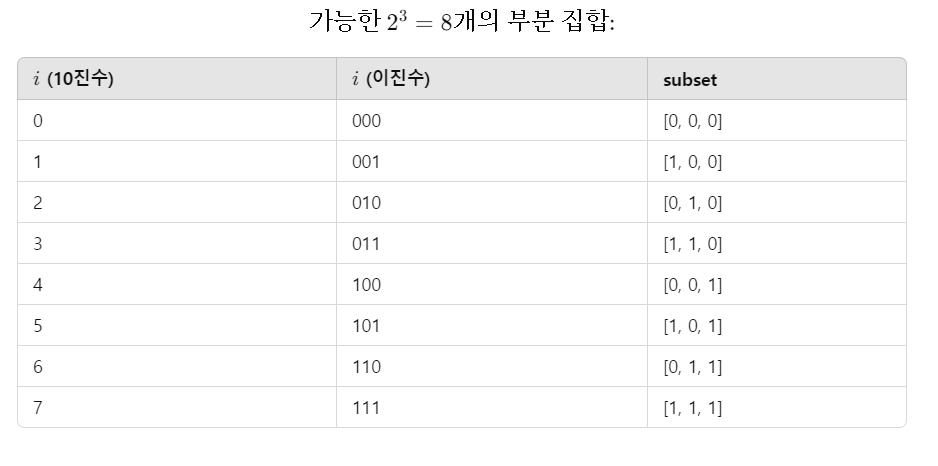

In [20]:
#  주어진 코드에 "배낭에 채워지는 물건"도 반환하도록 수정한 버전

def knapsack01_bruteforce(weights, values, W):
    """
    1. 0/1 배낭 문제를 억지 기법으로 해결.
    2. 최대 가치와 해당 물건 반환.
    :param weights: 물건별 무게 리스트
    :param values: 물건별 가치 리스트
    :param w: 배낭 용량
    :return: 최대 가치, 선택된 물건 인덱스 리스트
    """
    
    n = len(weights) # 전체 물건의 수
    best_value = 0 # 최대 가치 초기화
    best_subset = [] # 최대 가치일 때의 선택된 물건 저장
    
    for i in range(2**n): #bruteforce 기법
        # 1. 부분집합 i ->이진수 부분집합 표현
        subset = [0] * n
        temp = i
        for d in range(n):
            subset[d] = temp % 2
            temp //=2
            
        # 2. 현재 부분 집합 i 즉 subset의 무게와 가치 계산
        sum_weight = 0
        sum_value = 0
        current_subset = []
        for d in range(n):
            if subset[d] == 1: # 배낭에 물건을 포함시킬 때
                sum_weight += weights[d]
                sum_value += values[d]
                current_subset.append(d)
            
        # 3. 배낭 용량을 초과하지 않는 경우 최대 가치 갱신
        if sum_weight <= W and sum_value > best_value:
            best_value = sum_value
            best_subset = current_subset
            
    return best_value, best_subset
        
    

# 테스트 데이터
weights = [10, 20, 30, 25, 35]  # 물건별 무게
values = [60, 100, 120, 70, 85]  # 물건별 가치
W = 80  # 배낭 용량

# 실행
result_value, result_items = knapsack01_bruteforce(weights, values, W)
print("최대 가치:", result_value)
print("선택된 물건 인덱스:", result_items)

for idx in result_items:
    print(f"선택된 물건 무게:{weights[idx]}")

for idx in result_items:
    print(f"선택된 물건 가치:{values[idx]}")


최대 가치: 290
선택된 물건 인덱스: [1, 2, 3]
선택된 물건 무게:20
선택된 물건 무게:30
선택된 물건 무게:25
선택된 물건 가치:100
선택된 물건 가치:120
선택된 물건 가치:70


# #. Greedy method : 탐욕 기법
- Prim's algorithm:MST문제->최적해 보장

- O(E logV)
- O((V + E) \log V)

# 1. 분할 가능한 배낭 채우기 :

In [17]:
# 주어진 코드에 "최대 가치를 제공하는 물건 정보"도 반환하도록 수정한 버전
# 선택된 물건과 각 물건이 배낭에 담긴 비율도 함께 반환하도록 추가

def knapsackFrac(weights, values, W):
    
    """
    1. 분할 가능한 배낭 문제를 탐욕적 기법으로 해결
    2. 탐욕 조건: 단위 무게당 가격이 가장 높은 물건부터 넣기
    
    :param weights: 물건별 무게 리스트
    :param values: 물건별 가치 리스트
    :param w: 배낭 용량
    :return: 배낭에 담을 수 있는 최대 가치와 선택된 물건 정보
    """ 
    n=len(weights)
    # 1. 단위 무게당 가치를 계산 (for반복문 사용)
    items = []
    for i in range(n):
        unit_value = values[i] / weights[i]
        items.append((unit_value, weights[i], values[i], i)) #인덱스를 추가해 원본 물건 추적
        
    # 2. 단위 무게당 가치를 기준으로 하여 정렬 ( 내림차순)
    items.sort(reverse = True, key = lambda x : x[0])
    
    # 3. 탐욕적 선택으로 배닝 채우기
    max_value = 0
    selected_items = []
    
    for item in items:
        if W <= 0:
            break
        if item[1] <= W: # 물건 전체를 담을 수 있는 경우
            W -= item[1]
            max_value += item[2]
            selected_items.append((item[3],1)) #물건 인덱스와 비율 1 추가
        else: # 물건ㅇ,; ㅇ;ㄹ부만 담을 수 있는 경우
            fraction = W / item[1]
            max_value += item[2] * fraction
            selected_items.append((item[3], fraction))
            W = 0  #배낭을 다 채움
            
    return max_value, selected_items



# 테스트 데이터
weights = [8, 10, 12]  # 물건별 무게
values = [60, 80, 120]  # 물건별 가치
W = 18  # 배낭 용량

# 실행
result_value, result_items = knapsackFrac(weights, values, W)


print("Fractional Knapsack(18): 최대 가치 =", result_value)
print("선택된 물건 정보(인덱스,비율):", result_items)

for idx, fraction in result_items:
    print(f"믈건 {idx}: 무게 {weights[idx]}kg 중 {weights[idx] * fraction:.2f}kg, 가치 {values[idx] * fraction:.2f}")


Fractional Knapsack(18): 최대 가치 = 168.0
선택된 물건 정보(인덱스,비율): [(2, 1), (1, 0.6)]
믈건 2: 무게 12kg 중 12.00kg, 가치 120.00
믈건 1: 무게 10kg 중 6.00kg, 가치 48.00


# #. 분할 정복 기법(Divide and Conquer method)
 - 병합정렬(Merge Sort)
 - O(n log n)

# 1. 병합 정렬

In [4]:
# 각 병합 단계에서의 병합 후 배열 내용을 출력하도록 수정
# 분할 단계에서 배열의 상태를 출력하도록 코드를 수정

def merge_sort(A, left, right):
    
    """
    -병합 정렬 함수, 배열 A를 left부터 right까지 정렬
    -DC 기법 사용
    param A: 병합할 배열
    param left 왼쪽 부분 배열 시작 인덱스
    param mid 왼쪽 부분 배열 끝 인덱스
    param right 오른쪽 부분 배열 끝 인덱스
    """
    
    if left < right:
        # 1. 중간 인덱스 계산
        mid = (left + right) // 2
        # 분할 단계 결과 출력
        print(f"분할 단계: left={left}, mid={mid},right={right} 배열 상태={A[left:right + 1]}")
        # 2. 왼쪽 부분 배열 정렬
        merge_sort(A, left, mid)
        # 3. 오른쪽  부분 배열 정렬
        merge_sort(A, mid+1, right)
        
        # 4. 정렬된 두 부분 병합
        merge(A,left,mid,right)
        
def merge(A,left,mid,right):
    # 1. 병합을 위한 임시 리스트 생성
    sorted_temp = [0] * (right - left + 1)
    i, j, k = left, mid + 1,0
    
    # 2. 두 부분 배열을 비교하며 병합
    while i <= mid and j<=right:
        if A[i] <=A[j]:
            sorted_temp[k] = A[i]
            i, k = i+1,k+1
        else:
            sorted_temp[k]=A[j]
            j,k=j+1,k+1
    # 3. 남은 오른쪽 부분 배열 복사
    while j <=right:
        sorted_temp[k]=A[j]
        j,k=j+1,k+1
    # 4. 남은 왼쪽 부분 배열 복사
    while i <=mid:
        sorted_temp[k]=A[i]
        i,k=i+1,k+1
        
    # 5. 임시 배열의 결과를 원래 배열에 복사
        
    for k in range(len(sorted_temp)):
        A[left + k] = sorted_temp[k]
            
    # 6. 병합 단계 결과 출력
    print(f"병합 단계: left={left}, mid={mid},right={right} 병합 결과={A[left:right + 1]}")



# 테스트 코드
if __name__ == "__main__":
    # 테스트 데이터
    arr = [1, 3, 7, 8, 2, 4, 5, 9]
    print("정렬 전 배열:", arr)

    # 병합 정렬 실행
    merge_sort(arr, 0, len(arr) - 1)

    print("정렬 후 배열:", arr)


정렬 전 배열: [1, 3, 7, 8, 2, 4, 5, 9]
분할 단계: left=0, mid=3,right=7 배열 상태=[1, 3, 7, 8, 2, 4, 5, 9]
분할 단계: left=0, mid=1,right=3 배열 상태=[1, 3, 7, 8]
분할 단계: left=0, mid=0,right=1 배열 상태=[1, 3]
병합 단계: left=0, mid=0,right=1 병합 결과=[1, 3]
분할 단계: left=2, mid=2,right=3 배열 상태=[7, 8]
병합 단계: left=2, mid=2,right=3 병합 결과=[7, 8]
병합 단계: left=0, mid=1,right=3 병합 결과=[1, 3, 7, 8]
분할 단계: left=4, mid=5,right=7 배열 상태=[2, 4, 5, 9]
분할 단계: left=4, mid=4,right=5 배열 상태=[2, 4]
병합 단계: left=4, mid=4,right=5 병합 결과=[2, 4]
분할 단계: left=6, mid=6,right=7 배열 상태=[5, 9]
병합 단계: left=6, mid=6,right=7 병합 결과=[5, 9]
병합 단계: left=4, mid=5,right=7 병합 결과=[2, 4, 5, 9]
병합 단계: left=0, mid=3,right=7 병합 결과=[1, 2, 3, 4, 5, 7, 8, 9]
정렬 후 배열: [1, 2, 3, 4, 5, 7, 8, 9]


# #. 동적 계획법 (Dynamic Programming)

# 1. fibonacci 수열

In [13]:
#  메모이제이션 과정에서 각 계산 단계와 저장된 값을 출력하도록 수정한 코드

def fib_top_down_dp_memo(n, memo={}):
    """
    - 피보나치 수열을 메모이제이션을 사용한 Top-Down 방식으로 계싼
    - 부분 문제의 개수 : n이므로 성능은 시간복잡도와 공간복잡도는 각각 O(n)
    param n :계산할 피보나치 수의 위치
    param memo: 이미 계산된 피보나치 값을 저장하는 딕셔너리
    return: n번째 피보나치의 수
    """
    
    
    if n not in memo: #메모에 없는 경우 계산
        print(f"계산 중: fib({n})")
        if n <=1 : #기본 조건: n=0 or n=1
            memo[n] = n
        else:
            memo[n] = fib_top_down_dp_memo(n-1, memo) + fib_top_down_dp_memo(n-2, memo)
            
        print(f"메모이제이션: fib({n}) = {memo[n]}")# 저장된 값 출력
    else:
        print(f"메모 참조: fib({n}) = {memo[n]}")
    return memo[n]


# 테스트 코드
if __name__ == "__main__":
    # 테스트 데이터
    n = 4
    print(f"피보나치 수열의 {n}번째 항:", fib_top_down_dp_memo(n))

계산 중: fib(4)
계산 중: fib(3)
계산 중: fib(2)
계산 중: fib(1)
메모이제이션: fib(1) = 1
계산 중: fib(0)
메모이제이션: fib(0) = 0
메모이제이션: fib(2) = 1
메모 참조: fib(1) = 1
메모이제이션: fib(3) = 2
메모 참조: fib(2) = 1
메모이제이션: fib(4) = 3
피보나치 수열의 4번째 항: 3


In [8]:
# 테이블화과정에서 각 계산 단계와 저장된 값을 출력하도록 수정한 코드

def fib_bottomUP_dp_table(n):
    f = [None] * (n+1)
    f[0] = 0
    f[1] = 1
    for i in range(2, n + 1):
        f[i] = f[i-1] + f[i-2]
        
    return f[n]

# 테스트 코드
if __name__ == "__main__":
    # 테스트 데이터
    test_cases = [4]

    for n in test_cases:
        print(f"Fibonacci({n}) = {fib_bottomUP_dp_table(n)}")

Fibonacci(4) = 3


# 2. 배낭 채우기 (0/1 Kanpsack problem)

In [ ]:
# DP 알고리즘 기법 -> O(nW) : 문제: 0/1 배낭 문제에서 동적 계획법을 활용하여 배낭 용량 𝑊 안에 최대 가치를 계산.
# 2차원 DP 테이블을 생성하는 부분을 리스트 컴프리헨션 대신 for 반복문을 사용하여 수정한 코드
#각 물건 처리 후 (i 단계) DP 테이블의 상태를 출력.
# print 문을 통해 현재 물건 정보(무게와 가치)와 DP 테이블을 행 단위로 출력.



# 테스트 코드
if __name__ == "__main__":
    # 테스트 데이터
    wt = [2, 3, 4]  # 물건별 무게 리스트
    val = [3, 4, 5]  # 물건별 가치 리스트
    W = 5  # 배낭 용량
    n = len(wt)  # 물건의 개수

    # 실행
    result, selected_items = knapSack_dp(W, wt, val, n)
    print(f"\n배낭 용량 {W}에서의 최대 가치: {result}")
    print(f"선택된 물건 번호: {selected_items}")
    print("선택된 물건 정보:")
    for i in selected_items:
        print(f"  물건 {i}: 무게={wt[i - 1]}, 가치={val[i - 1]}")

# #. 공간으로 시간 벌기 : 해싱